### Import necessary libraries

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType, FloatType
from pyspark.sql.functions import *

from pyspark.ml.feature import StringIndexer

from pyspark.ml.feature import VectorAssembler

from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
spark = SparkSession.builder.appName("BD_Project").getOrCreate()

### Reading data from csv and renaming the column to remove space b/w there name

In [3]:
def extract(src):
    df = spark.read.csv(src, header = True, inferSchema = True)
    print(f"Rows: {df.count()},\tColumns: {len(df.columns)}")
    
    for col in df.columns:
        df = df.withColumnRenamed(col, col.replace(" ",""))
    
    return df

In [4]:
dataset = extract('F:\PAF KIET\Final Year\Spring 2023\Big Data\Project\cancer patient data sets.csv')

Rows: 1000,	Columns: 26


In [5]:
dataset.toPandas().head()

,index,PatientId,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
dataset.columns

['index',
 'PatientId',
 'Age',
 'Gender',
 'AirPollution',
 'Alcoholuse',
 'DustAllergy',
 'OccuPationalHazards',
 'GeneticRisk',
 'chronicLungDisease',
 'BalancedDiet',
 'Obesity',
 'Smoking',
 'PassiveSmoker',
 'ChestPain',
 'CoughingofBlood',
 'Fatigue',
 'WeightLoss',
 'ShortnessofBreath',
 'Wheezing',
 'SwallowingDifficulty',
 'ClubbingofFingerNails',
 'FrequentCold',
 'DryCough',
 'Snoring',
 'Level']

In [7]:
dataset.dtypes

[('index', 'int'),
 ('PatientId', 'string'),
 ('Age', 'int'),
 ('Gender', 'int'),
 ('AirPollution', 'int'),
 ('Alcoholuse', 'int'),
 ('DustAllergy', 'int'),
 ('OccuPationalHazards', 'int'),
 ('GeneticRisk', 'int'),
 ('chronicLungDisease', 'int'),
 ('BalancedDiet', 'int'),
 ('Obesity', 'int'),
 ('Smoking', 'int'),
 ('PassiveSmoker', 'int'),
 ('ChestPain', 'int'),
 ('CoughingofBlood', 'int'),
 ('Fatigue', 'int'),
 ('WeightLoss', 'int'),
 ('ShortnessofBreath', 'int'),
 ('Wheezing', 'int'),
 ('SwallowingDifficulty', 'int'),
 ('ClubbingofFingerNails', 'int'),
 ('FrequentCold', 'int'),
 ('DryCough', 'int'),
 ('Snoring', 'int'),
 ('Level', 'string')]

In [8]:
print(dataset.printSchema())

root
 |-- index: integer (nullable = true)
 |-- PatientId: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- AirPollution: integer (nullable = true)
 |-- Alcoholuse: integer (nullable = true)
 |-- DustAllergy: integer (nullable = true)
 |-- OccuPationalHazards: integer (nullable = true)
 |-- GeneticRisk: integer (nullable = true)
 |-- chronicLungDisease: integer (nullable = true)
 |-- BalancedDiet: integer (nullable = true)
 |-- Obesity: integer (nullable = true)
 |-- Smoking: integer (nullable = true)
 |-- PassiveSmoker: integer (nullable = true)
 |-- ChestPain: integer (nullable = true)
 |-- CoughingofBlood: integer (nullable = true)
 |-- Fatigue: integer (nullable = true)
 |-- WeightLoss: integer (nullable = true)
 |-- ShortnessofBreath: integer (nullable = true)
 |-- Wheezing: integer (nullable = true)
 |-- SwallowingDifficulty: integer (nullable = true)
 |-- ClubbingofFingerNails: integer (nullable = true)
 |-- FrequentCold: i

### Dropping unnecessary columns

In [9]:
dataset = dataset.drop(dataset['index']).drop(dataset['PatientId'])

In [10]:
print(dataset.printSchema())

root
 |-- Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- AirPollution: integer (nullable = true)
 |-- Alcoholuse: integer (nullable = true)
 |-- DustAllergy: integer (nullable = true)
 |-- OccuPationalHazards: integer (nullable = true)
 |-- GeneticRisk: integer (nullable = true)
 |-- chronicLungDisease: integer (nullable = true)
 |-- BalancedDiet: integer (nullable = true)
 |-- Obesity: integer (nullable = true)
 |-- Smoking: integer (nullable = true)
 |-- PassiveSmoker: integer (nullable = true)
 |-- ChestPain: integer (nullable = true)
 |-- CoughingofBlood: integer (nullable = true)
 |-- Fatigue: integer (nullable = true)
 |-- WeightLoss: integer (nullable = true)
 |-- ShortnessofBreath: integer (nullable = true)
 |-- Wheezing: integer (nullable = true)
 |-- SwallowingDifficulty: integer (nullable = true)
 |-- ClubbingofFingerNails: integer (nullable = true)
 |-- FrequentCold: integer (nullable = true)
 |-- DryCough: integer (nullable = true)
 |-- Snoring:

### Doing preproccessing

In [11]:
df = dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns])

In [12]:
df.toPandas().sample()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.show(1)

+---+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+-----+
|Age|Gender|AirPollution|Alcoholuse|DustAllergy|OccuPationalHazards|GeneticRisk|chronicLungDisease|BalancedDiet|Obesity|Smoking|PassiveSmoker|ChestPain|CoughingofBlood|Fatigue|WeightLoss|ShortnessofBreath|Wheezing|SwallowingDifficulty|ClubbingofFingerNails|FrequentCold|DryCough|Snoring|Level|
+---+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+-----+
|  0|     0|           0|         0|          0|                  0|          0|                 0|           0|      

In [14]:
dataset.toPandas().sample(5)

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
904,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
186,35,1,2,1,5,3,2,3,2,4,...,6,7,2,5,8,1,3,2,3,Medium
664,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
433,39,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
426,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


### Performing LabelEncoding

In [15]:
level = StringIndexer(inputCol='Level', outputCol='levelIndex')

In [16]:
dataset = level.fit(dataset).transform(dataset)

In [17]:
dataset.toPandas().sample(5)

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level,levelIndex
302,52,2,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,5,Medium,1.0
202,53,1,6,8,7,7,6,7,7,3,...,2,5,2,3,2,1,7,6,High,0.0
412,52,1,3,2,1,2,3,5,1,2,...,1,1,3,2,3,2,3,3,Low,2.0
486,48,1,4,2,3,2,1,2,3,2,...,6,1,2,4,2,1,2,3,Low,2.0
977,45,1,3,1,4,3,2,3,4,3,...,2,2,4,2,2,3,4,3,Low,2.0


In [18]:
dataset.show(1)

+---+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+-----+----------+
|Age|Gender|AirPollution|Alcoholuse|DustAllergy|OccuPationalHazards|GeneticRisk|chronicLungDisease|BalancedDiet|Obesity|Smoking|PassiveSmoker|ChestPain|CoughingofBlood|Fatigue|WeightLoss|ShortnessofBreath|Wheezing|SwallowingDifficulty|ClubbingofFingerNails|FrequentCold|DryCough|Snoring|Level|levelIndex|
+---+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+-----+----------+
| 33|     1|           2|         4|          5|                  4|          3|     

### Visualization

In [19]:
newDataSet = dataset.toPandas()

<AxesSubplot:xlabel='Level', ylabel='count'>

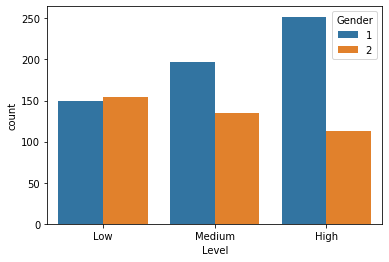

In [20]:
sns.countplot(x='Level', hue='Gender', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

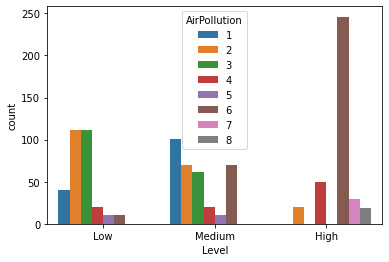

In [21]:
sns.countplot(x='Level', hue='AirPollution', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

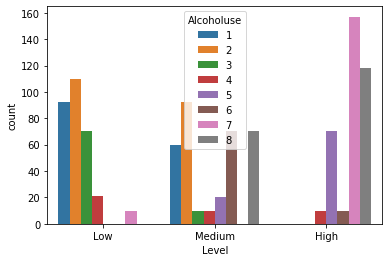

In [22]:
sns.countplot(x='Level', hue='Alcoholuse', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

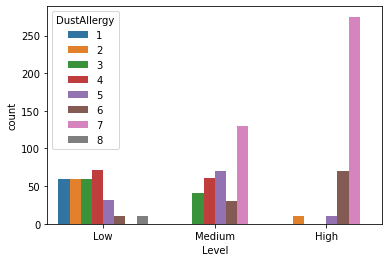

In [23]:
sns.countplot(x='Level', hue='DustAllergy', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

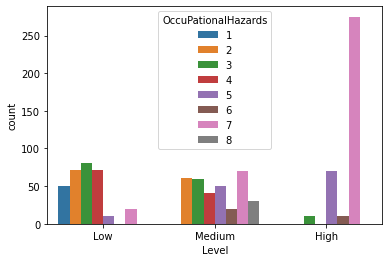

In [24]:
sns.countplot(x='Level', hue='OccuPationalHazards', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

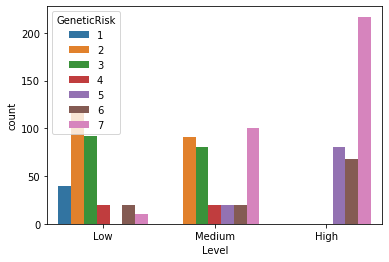

In [25]:
sns.countplot(x='Level', hue='GeneticRisk', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

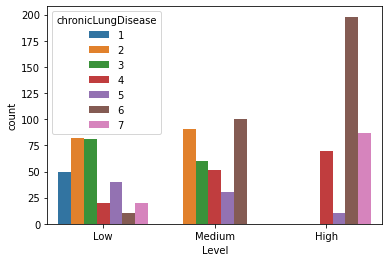

In [26]:
sns.countplot(x='Level', hue='chronicLungDisease', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

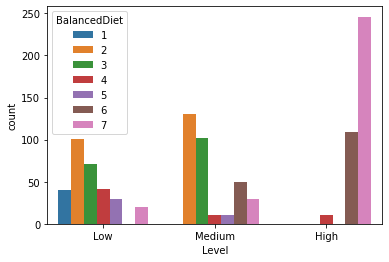

In [27]:
sns.countplot(x='Level', hue='BalancedDiet', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

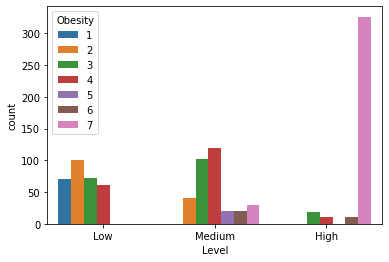

In [28]:
sns.countplot(x='Level', hue='Obesity', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

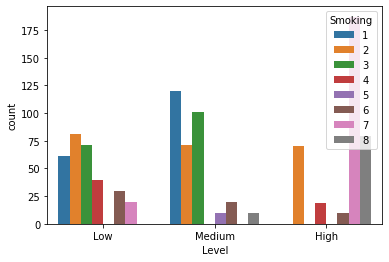

In [29]:
sns.countplot(x='Level', hue='Smoking', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

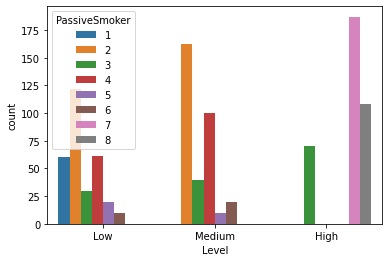

In [30]:
sns.countplot(x='Level', hue='PassiveSmoker', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

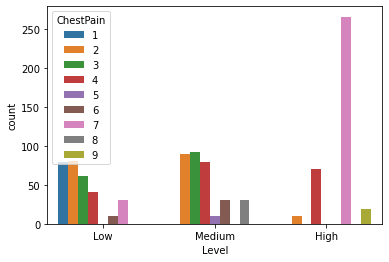

In [31]:
sns.countplot(x='Level', hue='ChestPain', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

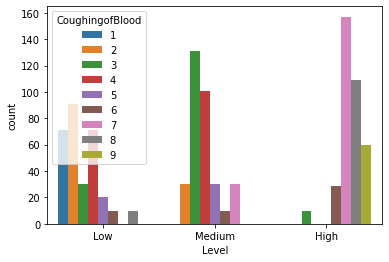

In [32]:
sns.countplot(x='Level', hue='CoughingofBlood', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

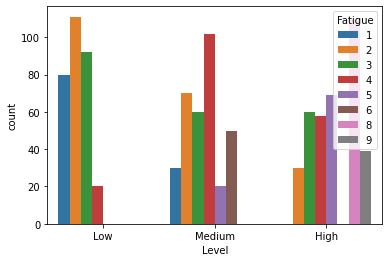

In [33]:
sns.countplot(x='Level', hue='Fatigue', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

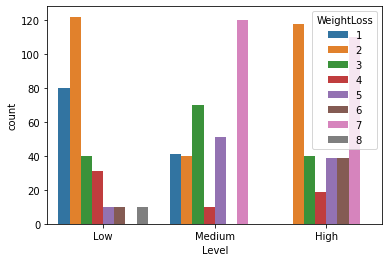

In [34]:
sns.countplot(x='Level', hue='WeightLoss', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

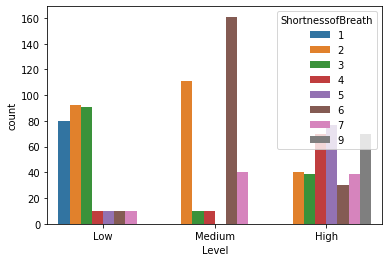

In [35]:
sns.countplot(x='Level', hue='ShortnessofBreath', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

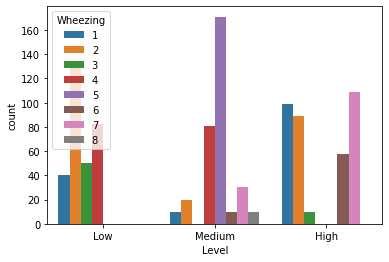

In [36]:
sns.countplot(x='Level', hue='Wheezing', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

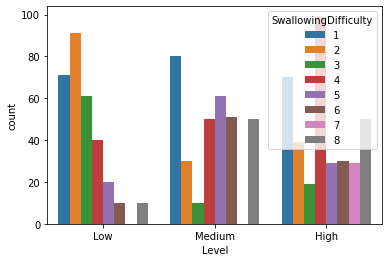

In [37]:
sns.countplot(x='Level', hue='SwallowingDifficulty', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

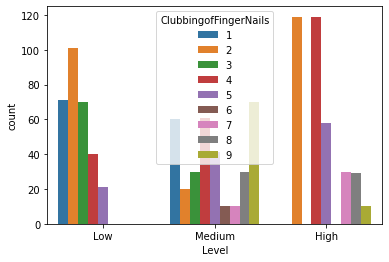

In [38]:
sns.countplot(x='Level', hue='ClubbingofFingerNails', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

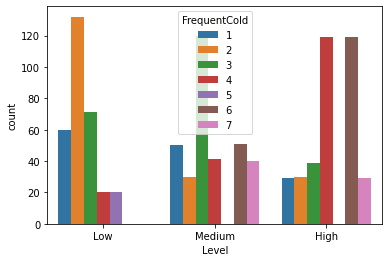

In [39]:
sns.countplot(x='Level', hue='FrequentCold', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

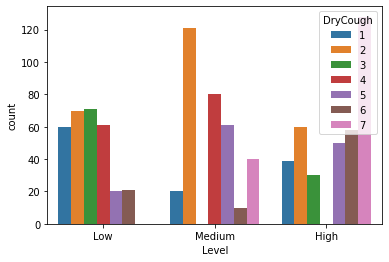

In [40]:
sns.countplot(x='Level', hue='DryCough', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

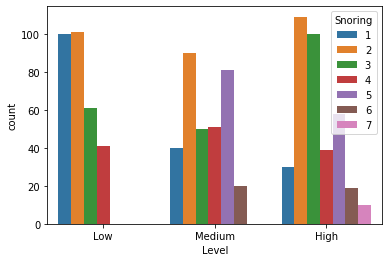

In [41]:
sns.countplot(x='Level', hue='Snoring', data=newDataSet)

<AxesSubplot:xlabel='Level', ylabel='count'>

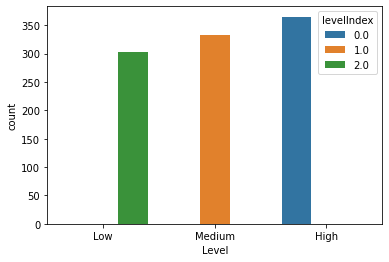

In [42]:
sns.countplot(x='Level', hue='levelIndex', data=newDataSet)

### Drawing heatmap

<AxesSubplot:>

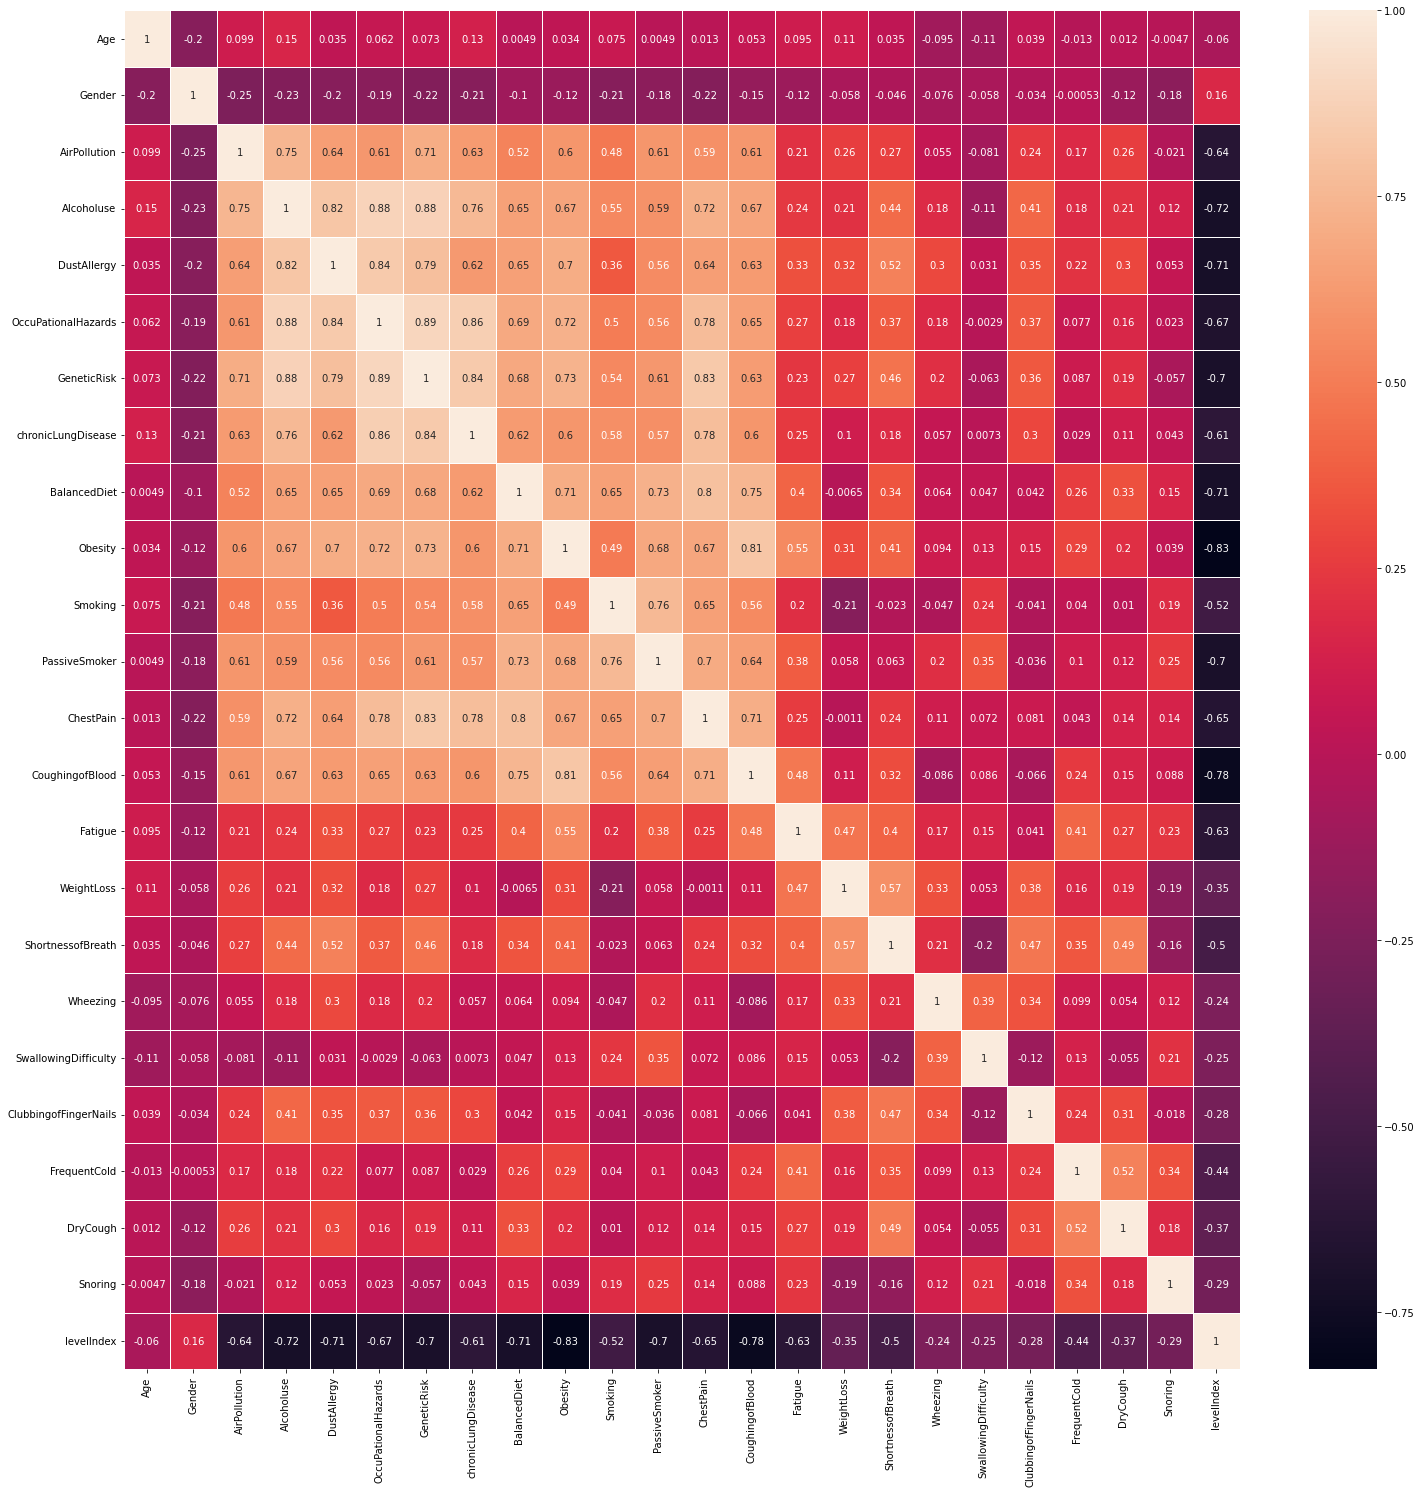

In [43]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(dataset.toPandas().corr(), annot = True, linewidths=.5, ax=ax)

In [44]:
dataset = dataset.drop(dataset.Age).drop(dataset.Level)

<AxesSubplot:>

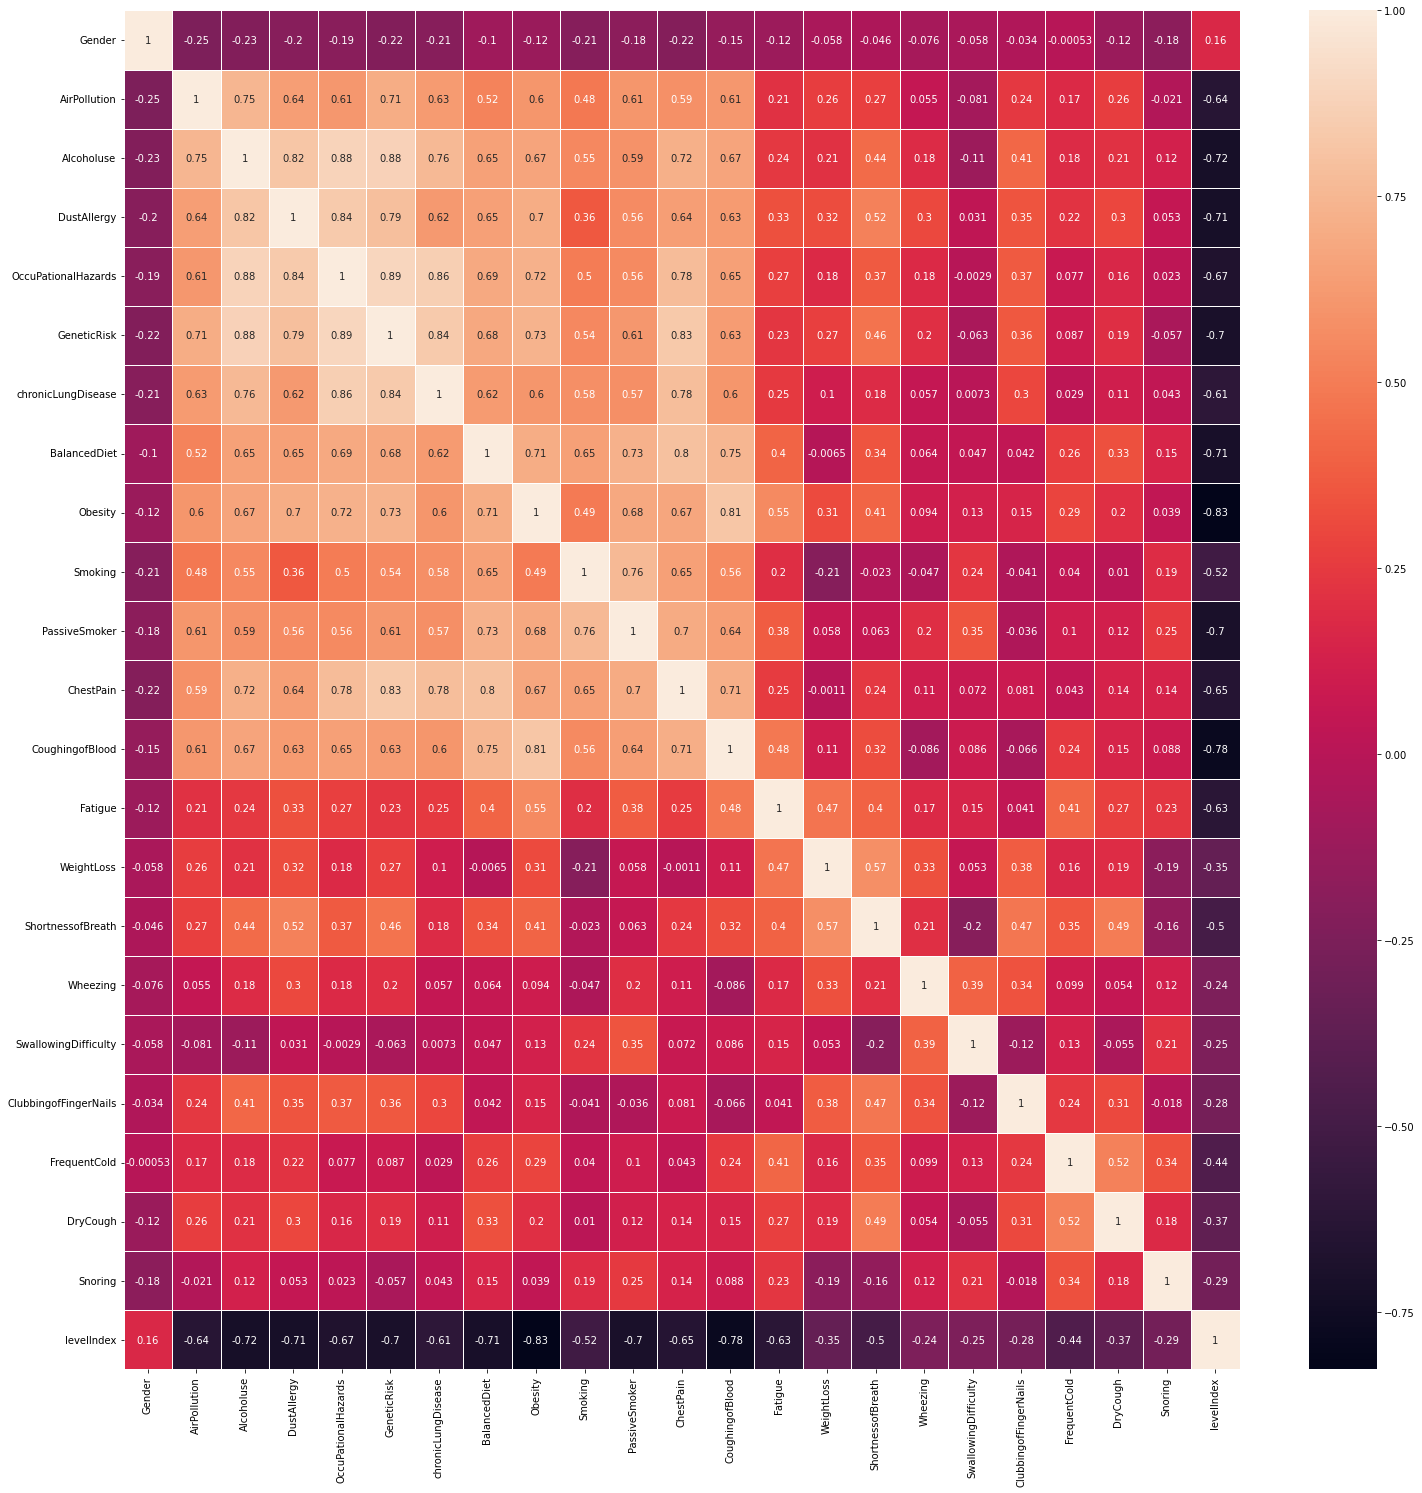

In [45]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(dataset.toPandas().corr(), annot = True, linewidths=.5, ax=ax)

### New dataset

#### Info of new dataset

In [46]:
newDataSet = dataset.toPandas()

In [47]:
newDataSet.head()

,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,Smoking,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,levelIndex
0,1,2,4,5,4,3,2,2,4,3,...,3,4,2,2,3,1,2,3,4,2.0
1,1,3,1,5,3,4,2,2,2,2,...,1,3,7,8,6,2,1,7,2,1.0
2,1,4,5,6,5,5,4,6,7,2,...,8,7,9,2,1,4,6,7,2,0.0
3,1,7,7,7,7,6,7,7,7,7,...,4,2,3,1,4,5,6,7,5,0.0
4,1,6,8,7,7,7,6,7,7,8,...,3,2,4,1,4,2,4,2,3,0.0


In [48]:
newDataSet.shape

(1000, 23)

In [49]:
newDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 1000 non-null   int32  
 1   AirPollution           1000 non-null   int32  
 2   Alcoholuse             1000 non-null   int32  
 3   DustAllergy            1000 non-null   int32  
 4   OccuPationalHazards    1000 non-null   int32  
 5   GeneticRisk            1000 non-null   int32  
 6   chronicLungDisease     1000 non-null   int32  
 7   BalancedDiet           1000 non-null   int32  
 8   Obesity                1000 non-null   int32  
 9   Smoking                1000 non-null   int32  
 10  PassiveSmoker          1000 non-null   int32  
 11  ChestPain              1000 non-null   int32  
 12  CoughingofBlood        1000 non-null   int32  
 13  Fatigue                1000 non-null   int32  
 14  WeightLoss             1000 non-null   int32  
 15  Short

In [50]:
newDataSet.describe()

,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,Smoking,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,levelIndex
count,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.938000
std,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


#### Counting columns variation values

In [51]:
for col in dataset.columns:
    print('Column Name: ', col)
    data = newDataSet[col].value_counts()
    print(data, end="\n\n")

Column Name:  Gender
1    598
2    402
Name: Gender, dtype: int64

Column Name:  AirPollution
6    326
2    201
3    173
1    141
4     90
7     30
5     20
8     19
Name: AirPollution, dtype: int64

Column Name:  Alcoholuse
2    202
8    188
7    167
1    152
5     90
3     80
6     80
4     41
Name: Alcoholuse, dtype: int64

Column Name:  DustAllergy
7    405
4    133
5    111
6    110
3    101
2     70
1     60
8     10
Name: DustAllergy, dtype: int64

Column Name:  OccuPationalHazards
7    365
3    151
2    132
5    130
4    112
1     50
6     30
8     30
Name: OccuPationalHazards, dtype: int64

Column Name:  GeneticRisk
7    327
2    212
3    173
6    108
5    100
4     40
1     40
Name: GeneticRisk, dtype: int64

Column Name:  chronicLungDisease
6    308
2    173
4    141
3    141
7    107
5     80
1     50
Name: chronicLungDisease, dtype: int64

Column Name:  BalancedDiet
7    296
2    231
3    173
6    159
4     61
5     40
1     40
Name: BalancedDiet, dtype: int64

Column Name

#### Renaming the column

In [52]:
dataset = dataset.withColumnRenamed('levelIndex', 'Level')

In [53]:
dataset.toPandas().head()

,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,Smoking,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,1,2,4,5,4,3,2,2,4,3,...,3,4,2,2,3,1,2,3,4,2.0
1,1,3,1,5,3,4,2,2,2,2,...,1,3,7,8,6,2,1,7,2,1.0
2,1,4,5,6,5,5,4,6,7,2,...,8,7,9,2,1,4,6,7,2,0.0
3,1,7,7,7,7,6,7,7,7,7,...,4,2,3,1,4,5,6,7,5,0.0
4,1,6,8,7,7,7,6,7,7,8,...,3,2,4,1,4,2,4,2,3,0.0


#### Appling train test split

In [54]:
features = dataset.drop('Level')

In [55]:
features.show(1)

+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+
|Gender|AirPollution|Alcoholuse|DustAllergy|OccuPationalHazards|GeneticRisk|chronicLungDisease|BalancedDiet|Obesity|Smoking|PassiveSmoker|ChestPain|CoughingofBlood|Fatigue|WeightLoss|ShortnessofBreath|Wheezing|SwallowingDifficulty|ClubbingofFingerNails|FrequentCold|DryCough|Snoring|
+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+
|     1|           2|         4|          5|                  4|          3|                 2|           2|      4|      3|            2|        2|

In [56]:
assembler = VectorAssembler(inputCols=features.columns, outputCol='features')
transformed_data = assembler.transform(dataset)
transformed_data.show(5, truncate=False)

+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+-----+-----------------------------------------------------------------------------------------+
|Gender|AirPollution|Alcoholuse|DustAllergy|OccuPationalHazards|GeneticRisk|chronicLungDisease|BalancedDiet|Obesity|Smoking|PassiveSmoker|ChestPain|CoughingofBlood|Fatigue|WeightLoss|ShortnessofBreath|Wheezing|SwallowingDifficulty|ClubbingofFingerNails|FrequentCold|DryCough|Snoring|Level|features                                                                                 |
+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------

In [57]:
(X_train, X_test) = transformed_data.randomSplit([0.8,0.2])

In [58]:
X_train.show(1)

+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+-----+--------------------+
|Gender|AirPollution|Alcoholuse|DustAllergy|OccuPationalHazards|GeneticRisk|chronicLungDisease|BalancedDiet|Obesity|Smoking|PassiveSmoker|ChestPain|CoughingofBlood|Fatigue|WeightLoss|ShortnessofBreath|Wheezing|SwallowingDifficulty|ClubbingofFingerNails|FrequentCold|DryCough|Snoring|Level|            features|
+------+------------+----------+-----------+-------------------+-----------+------------------+------------+-------+-------+-------------+---------+---------------+-------+----------+-----------------+--------+--------------------+---------------------+------------+--------+-------+-----+--------------------+
|     1|           1|         2|          3|                  4|   

#### Decision Tree

In [59]:
decisionTreeClassifier = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'Level', maxDepth = 3)

In [60]:
model = decisionTreeClassifier.fit(X_train)

In [61]:
predictions = model.transform(X_test)
predictions.select('Level','prediction').show(5)

+-----+----------+
|Level|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  2.0|       2.0|
|  2.0|       2.0|
+-----+----------+
only showing top 5 rows



In [62]:
predictions.groupBy('Level', 'prediction').count().show()

+-----+----------+-----+
|Level|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|   69|
|  2.0|       2.0|   57|
|  1.0|       0.0|    2|
|  1.0|       2.0|    2|
|  0.0|       0.0|   66|
|  0.0|       2.0|    2|
+-----+----------+-----+



In [63]:
y_true = predictions.select('Level').rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()

#### Metrices

In [64]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        68
         1.0       1.00      0.95      0.97        73
         2.0       0.93      1.00      0.97        57

    accuracy                           0.97       198
   macro avg       0.97      0.97      0.97       198
weighted avg       0.97      0.97      0.97       198



In [65]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[66  0  2]
 [ 2 69  2]
 [ 0  0 57]]


Text(69.0, 0.5, 'Truth')

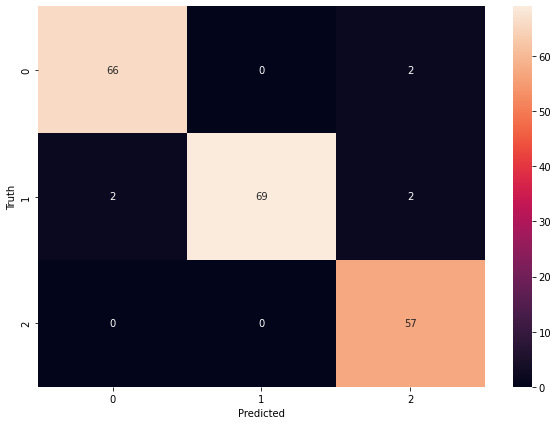

In [66]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy

In [67]:
print("Accuracy of data:", accuracy_score(y_true, y_pred))

Accuracy of data: 0.9696969696969697


#### Random Forest

In [68]:
RFClassifier = RandomForestClassifier(labelCol='Level', featuresCol='features', maxDepth=5)

In [69]:
model = RFClassifier.fit(X_train)

In [70]:
predictions = model.transform(X_test)
predictions.select('Level','prediction').show(5)

+-----+----------+
|Level|prediction|
+-----+----------+
|  1.0|       1.0|
|  1.0|       1.0|
|  1.0|       1.0|
|  2.0|       2.0|
|  2.0|       2.0|
+-----+----------+
only showing top 5 rows



In [71]:
predictions.groupBy('Level', 'prediction').count().show()

+-----+----------+-----+
|Level|prediction|count|
+-----+----------+-----+
|  1.0|       1.0|   73|
|  2.0|       2.0|   57|
|  0.0|       0.0|   68|
+-----+----------+-----+



In [72]:
y_true = predictions.select('Level').rdd.flatMap(list).collect()
y_pred = predictions.select('prediction').rdd.flatMap(list).collect()

#### Metrics

In [73]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        68
         1.0       1.00      1.00      1.00        73
         2.0       1.00      1.00      1.00        57

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [74]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[68  0  0]
 [ 0 73  0]
 [ 0  0 57]]


Text(69.0, 0.5, 'Truth')

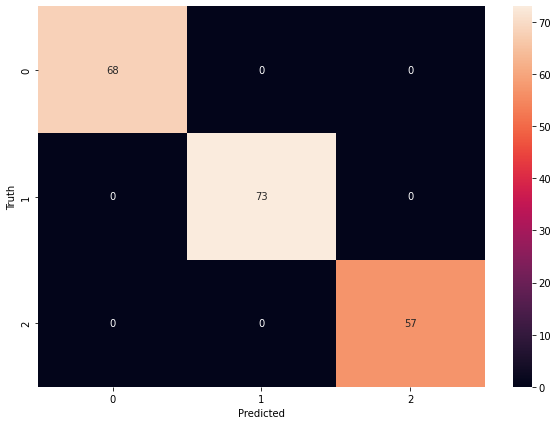

In [75]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy

In [76]:
print("Accuracy of data:", accuracy_score(y_true, y_pred))

Accuracy of data: 1.0
